In [3]:
import pandas as pd
from retentioneering import preparing

path = './your_data.csv'
path = '../../data/all_events_users_camesince0106_til1201.csv'

df = pd.read_csv(path)
# timestamp should be in YYYY-MM-DD HH:MM:SS.f format
df.event_timestamp = pd.to_datetime(df.event_timestamp)

settings = {}

model = preparing.SessionSplitter(n_components=3)
model.fit(df[~df.event_name.isin(['lost', 'passed'])], 
          columns_config = {'event_name_col': 'event_name',
                            'event_timestamp_col': 'event_timestamp',
                            'user_id_col': 'user_pseudo_id'})

data = model.predict(df, thr_prob=0.9, sort=True)

In [ ]:
# you also could visualize how GaussianMixture fit your time between events
# plot graph in density form

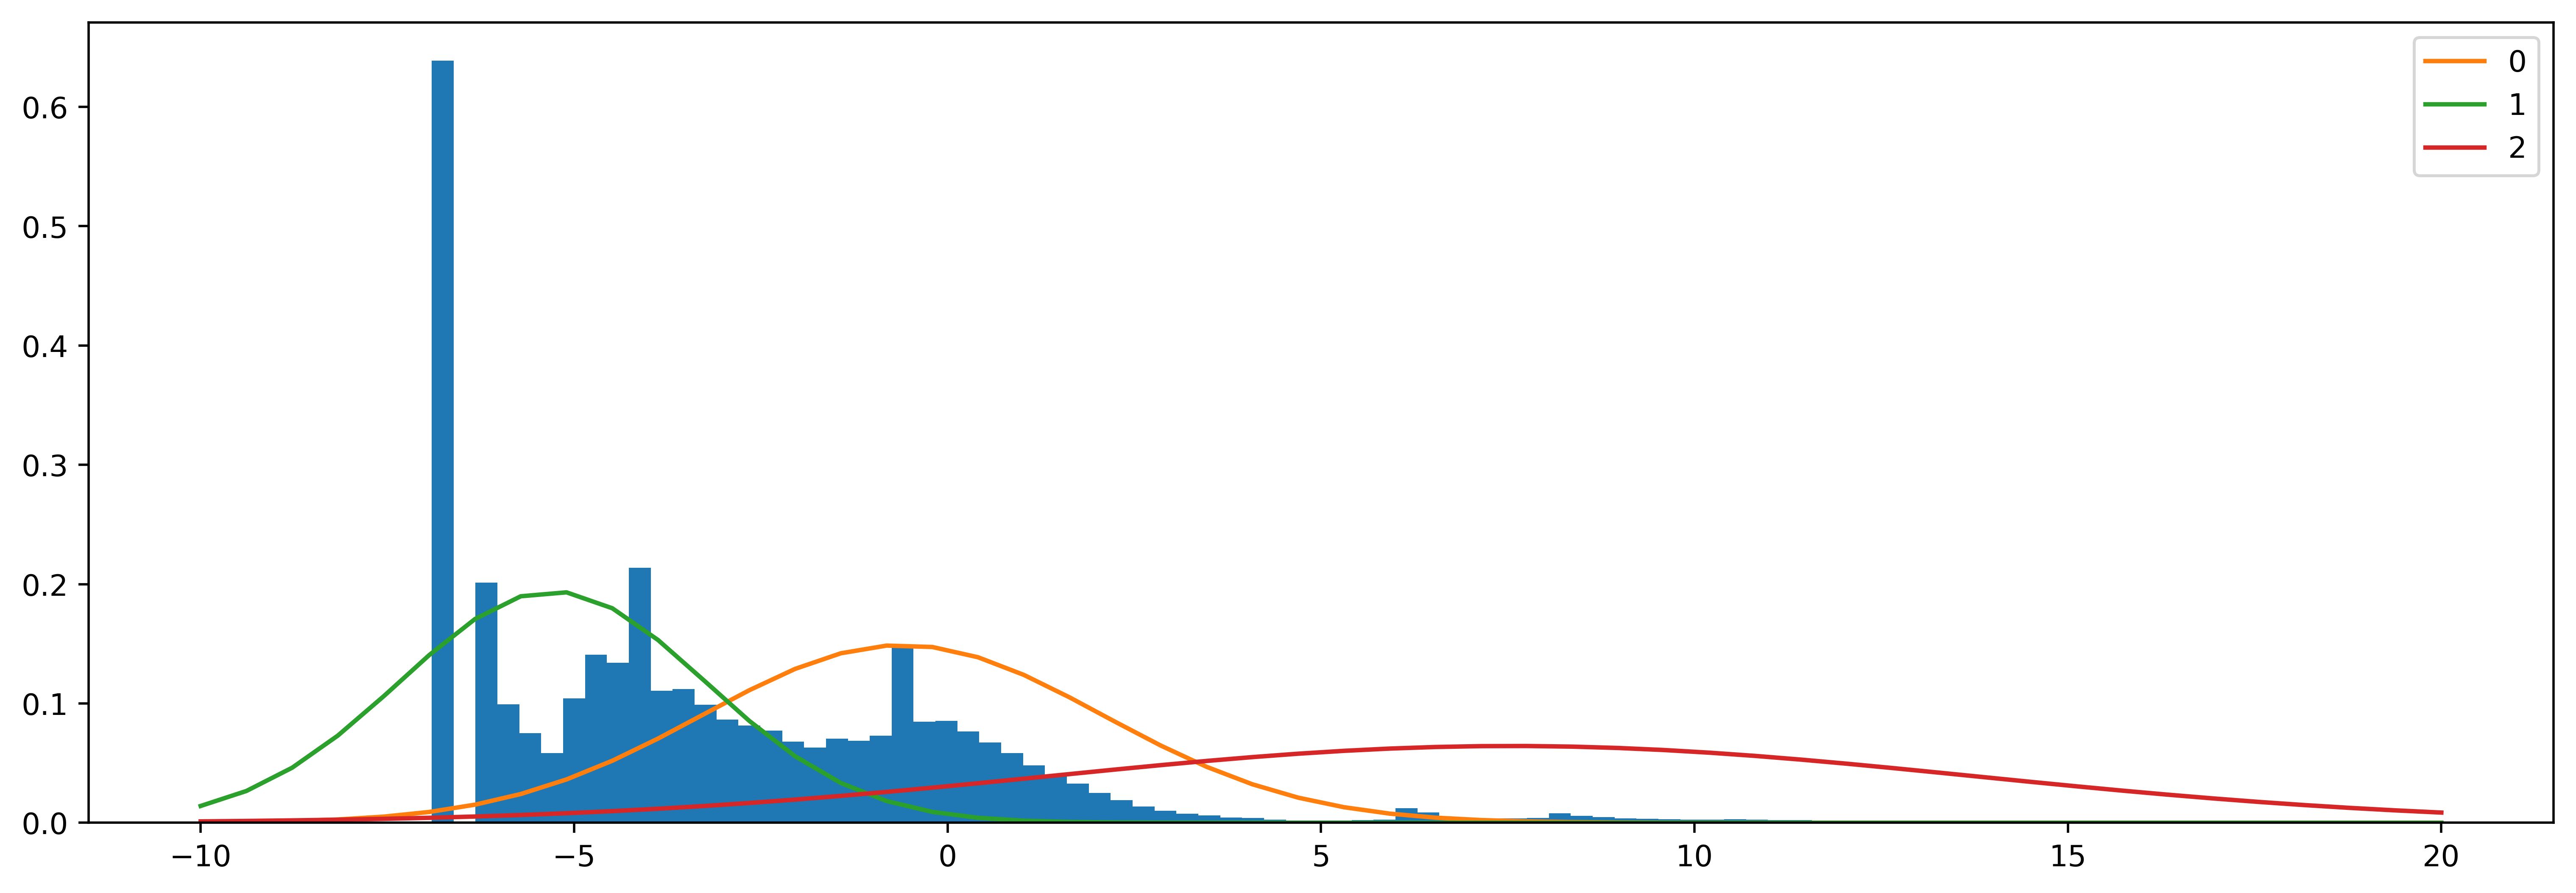

In [4]:
model.visualize(df, bins=80, density=True)

In [1]:
data.to_csv('./your_data_sessions_splited.csv', index=False)